In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
from matplotlib import rcParams
from statsmodels.tsa.stattools import acf,adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
from water_data import Water

In [ ]:
wa=Water()

In [5]:
waterDF=wa.api_data()

오류 발생: "['ITEM_DEPTH'] not in index"


In [6]:
waterDF.describe().T

ValueError: Cannot describe a DataFrame without columns

In [ ]:
waterDF

,총량지점명,일자,수온,수소이온농도(ph),전기전도도(EC),용존산소(DO),BOD,COD,부유물질,총질소(T-N),총인(T-P),총유기탄소(TOC),유량,클로로필-a
0,물금,2021-01-04,4.6,7.5,437.0,13.1,1.7,5.1,2.4,3.223,0.025,3.8,29.555,12.4
1,물금,2021-01-11,2.8,7.3,461.0,14.3,2.0,5.4,4.0,3.268,0.031,4.0,28.599,19.4
2,물금,2021-01-26,5.1,7.2,470.0,15.6,2.1,6.0,7.6,3.416,0.026,4.6,74.897,47.3
3,물금,2021-01-18,3.1,7.3,463.0,15.2,2.2,5.9,6.4,3.327,0.032,4.4,47.190,33.2
4,물금,2021-02-16,6.6,8.4,451.0,12.1,2.8,6.6,12.4,3.489,0.027,5.0,72.735,50.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,금곡,2025-09-23,25.4,7.7,285.0,7.8,1.3,6.9,6.4,1.928,0.055,3.6,357.260,17.4
402,금곡,2025-09-09,28.6,8.6,219.0,7.6,1.7,8.6,9.6,1.579,0.059,6.1,340.400,52.6
403,금곡,2025-10-13,23.3,8.4,288.0,9.0,1.6,7.0,7.6,1.858,0.041,3.4,443.810,39.5
404,금곡,2025-10-27,19.0,7.8,192.0,9.5,1.1,6.4,6.4,2.719,0.082,3.2,443.180,20.4


물금 유량 대비 금곡 유량이 일정 비율 이하로 떨어질 때, 즉 두 지점 사이의 체류시간이 일정 이상일때 클로로필a농도가 상승할 것이다. 귀무 가설

결론, 두 지점 사이의 유량 차이를 일정 이상 유지하는게 좋을 수 도 있다.


In [ ]:
mulgeum_df = waterDF[waterDF['총량지점명'] == '물금'].copy().set_index('일자')
geumgok_df = waterDF[waterDF['총량지점명'] == '금곡'].copy().set_index('일자')

<Axes: xlabel='유량', ylabel='클로로필-a'>

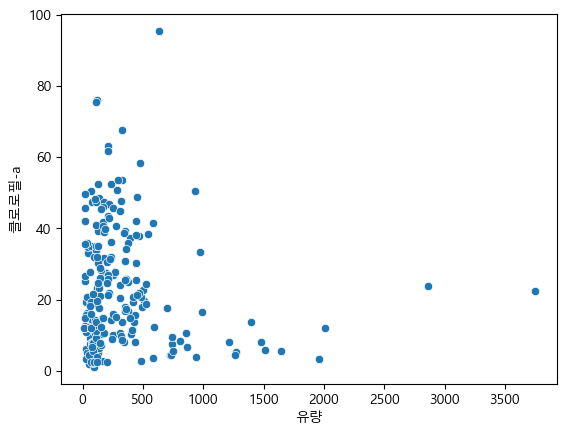

In [ ]:
sb.scatterplot(data=mulgeum_df, x='유량', y='클로로필-a')